In [ ]:
# panda library to read excel file
import pandas as pd

# string library to use stopword dictionary
import string as string

# numpy for stronger caculate
import numpy as np


# nltk library to lemmatize or stemming word
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

#download all the necessary resource
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

#re library to filter the text
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
 from google.colab import files
 uploaded=files.upload()

Saving data.xlsx to data.xlsx


In [ ]:
df=pd.read_excel("data.xlsx")
df.shape

(1133, 4)

In [ ]:
listLabel=(list(df['Category'].drop_duplicates()))
print(listLabel)

['adult', 'arts-and-entertainment', 'business-and-consumer-services', 'computers-electronics-and-technology', 'sports', 'science-and-education', 'food-and-drink', 'travel-and-tourism', 'health', 'pets-and-animals', 'law-and-government']


In [ ]:
listLabel = df['Category'].value_counts().keys().tolist()
counts = df['Category'].value_counts().tolist()
print(listLabel)
print(counts)

['sports', 'science-and-education', 'health', 'pets-and-animals', 'business-and-consumer-services', 'law-and-government', 'travel-and-tourism', 'computers-electronics-and-technology', 'food-and-drink', 'arts-and-entertainment', 'adult']
[217, 206, 201, 96, 94, 89, 61, 59, 55, 45, 10]


<function matplotlib.pyplot.show(*args, **kw)>

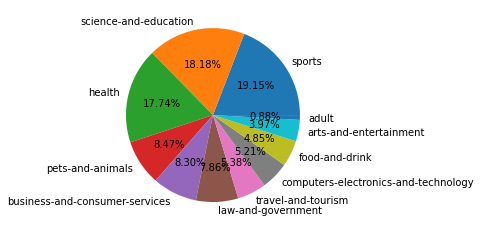

In [ ]:
plt.pie(counts, labels = listLabel,autopct='%.2f%%')
plt.show

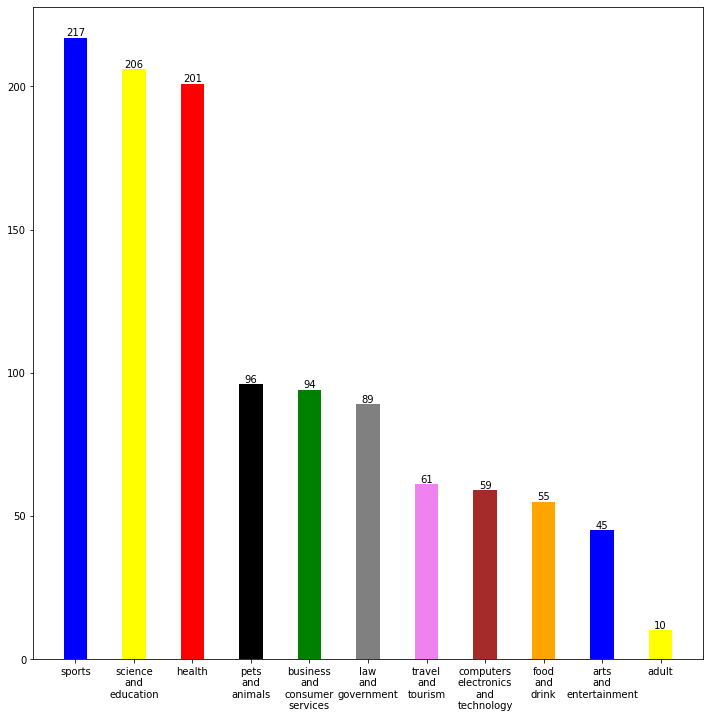

In [ ]:
x_pos=[2*x for x in range(len(listLabel))]
listWrapLabel=[listl.replace("-","\n") for listl in listLabel]
listColor=["blue","yellow","red","black","green","grey","violet","brown","orange"]
plt.figure(figsize=(12,12))
plt.bar(x_pos,df['Category'].value_counts(),align="center",color=listColor)
plt.xticks(x_pos, listWrapLabel)
for i in range(len(listLabel)):
    plt.text(2*i,counts[i],counts[i],ha="center",va="bottom")

In [ ]:
tags=["a","abbr","acronym","address","area","b","base","bdo","big","blockquote","body","br","button","caption","cite","code","col","colgroup","dd","del","dfn","div","dl","DOCTYPE","dt","em","fieldset","form","h1","h2","h3","h4","h5","h6","head","html","hr","i","img","input","ins","kbd","label","legend","li","link","map","meta","noscript","object","ol","optgroup","option","p","param","pre","q","samp","script","select","small","span","strong","style","sub","sup","table","tbody","td","textarea","tfoot","th","thead","title","tr","tt","ul","var"]
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer
def pre_process(text):
    #lower case all the text
    text_lower=str(text).lower()
    #remove all the url in the text
    text_no_link=re.sub(r"http\S+", "", text_lower)
    #remove all digit,punctuation,... and only keep the alphabetic words
    text_clean=re.sub(r'[^a-z]', ' ', text_no_link)
    text_clean=" ".join(text_clean.split())
    #use wordnet lemmatizer to lemmatize the text
    stemmer = SnowballStemmer(language='english')
    #tokenize to make array of words
    words = word_tokenize(text_clean)
    words=[word for word in words if word not in tags]
    words=[word for word in words if len(word)>2]
    #remove all stop word such as a,he,she,many,...
    word_no_stop=[word for word in words if word not in stopwords.words('english')]
    #lemmatize all the text
    word_stem=[stemmer.stem(word) for word in word_no_stop]
    return word_stem

In [ ]:
df["clean_text"]=df["content"].apply(pre_process)

In [ ]:
list_df_by_category=[]
for i in range(len(listLabel)) :
    list_df_by_category.append(df[df["Category"]==listLabel[i]].reset_index(drop=True))

In [ ]:
from wordcloud import WordCloud
content=''
for i in range (len(list_df_by_category)):
    for j in range (len(list_df_by_category[i])):
        for word in (list_df_by_category[i]["clean_text"][j]):
            content=content+word+' '
    wordcloud_df=WordCloud(width=800,height=600,background_color='white').generate(content)
    plt.figure(figsize=(8,8),)
    plt.axis('off')
    plt.imshow(wordcloud_df)
    plt.title(listLabel[i])
    content=''

Output hidden; open in https://colab.research.google.com to view.

['new', 'news', 'shop', 'januari', 'rugbi', 'accessori', 'sport', 'golf', 'bike', 'team']
[1549, 1196, 1088, 1045, 988, 815, 801, 775, 762, 760]
['research', 'student', 'new', 'scienc', 'learn', 'read', 'univers', 'find', 'news', 'use']
[784, 743, 686, 679, 635, 609, 543, 538, 529, 526]
['health', 'care', 'servic', 'help', 'support', 'medic', 'shop', 'find', 'best', 'get']
[1700, 1173, 893, 884, 825, 718, 689, 678, 669, 653]
['dog', 'price', 'pet', 'sale', 'shop', 'food', 'bird', 'new', 'cat', 'race']
[1000, 855, 755, 547, 535, 496, 419, 405, 399, 396]
['back', 'servic', 'busi', 'custom', 'english', 'get', 'product', 'help', 'new', 'manag']
[775, 719, 530, 518, 467, 451, 403, 370, 357, 339]
['visa', 'servic', 'inform', 'januari', 'news', 'new', 'help', 'work', 'search', 'support']
[569, 483, 428, 376, 351, 335, 312, 293, 270, 257]
['hotel', 'car', 'new', 'travel', 'ticket', 'flight', 'tour', 'book', 'airport', 'park']
[1244, 498, 464, 458, 426, 390, 365, 354, 340, 316]
['product', 'pla

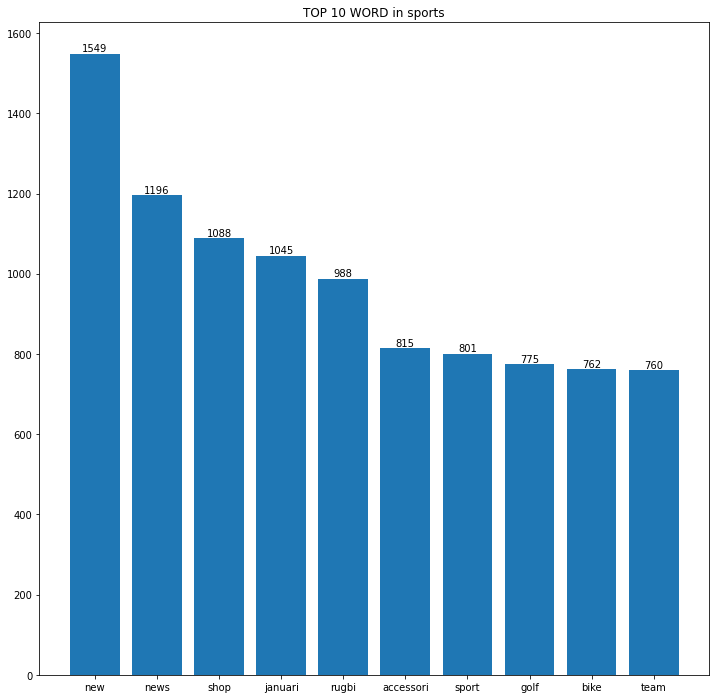

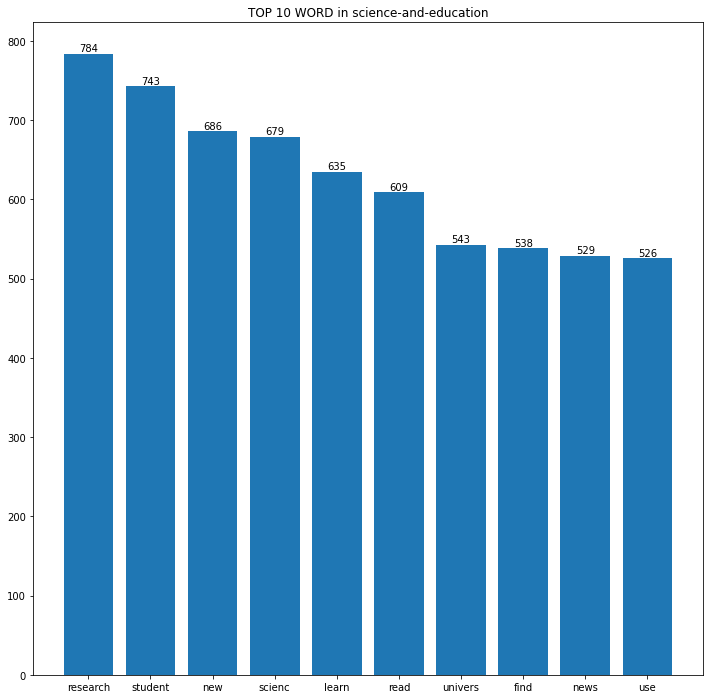

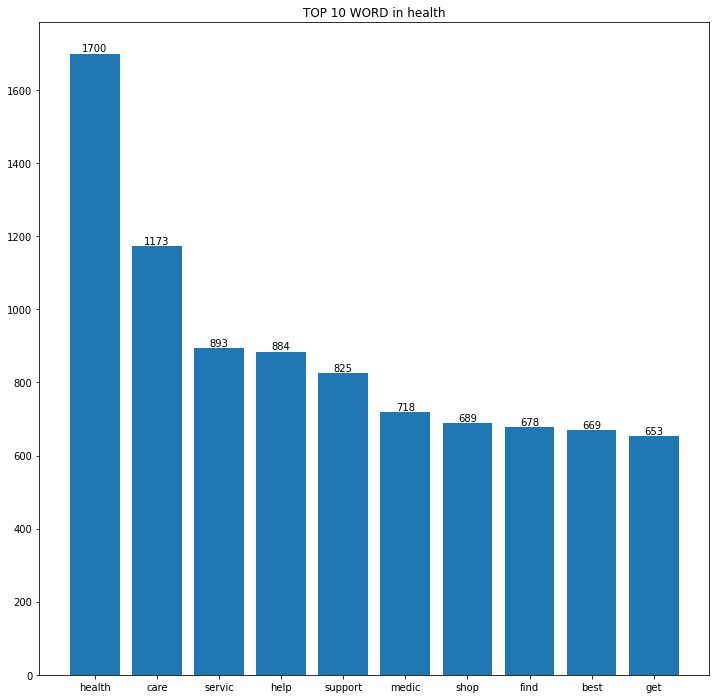

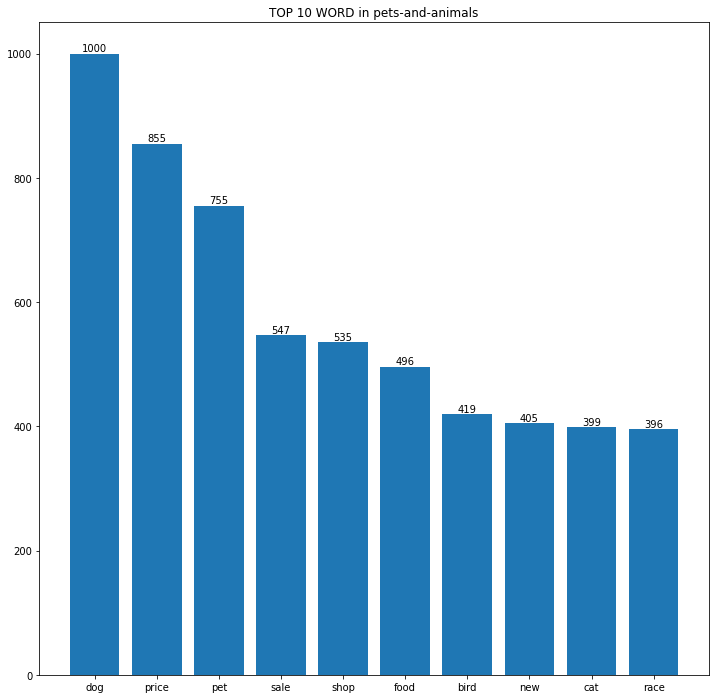

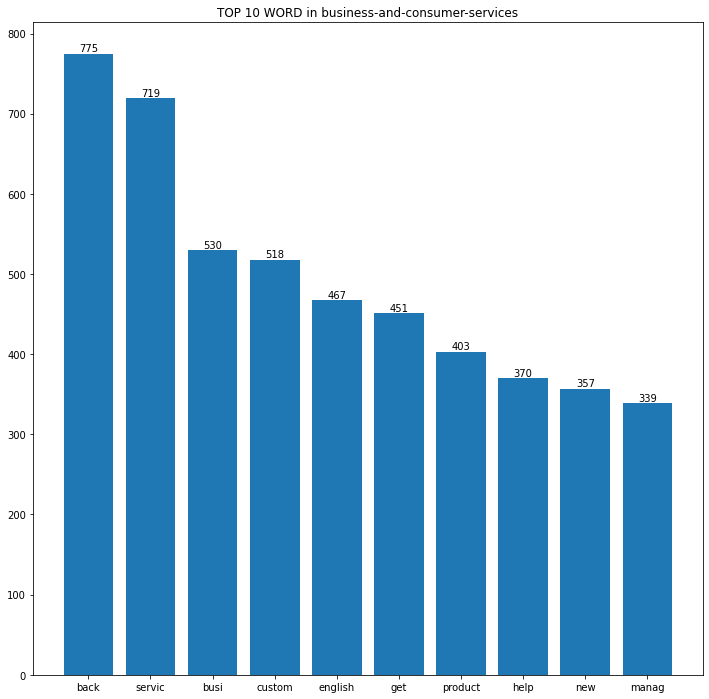

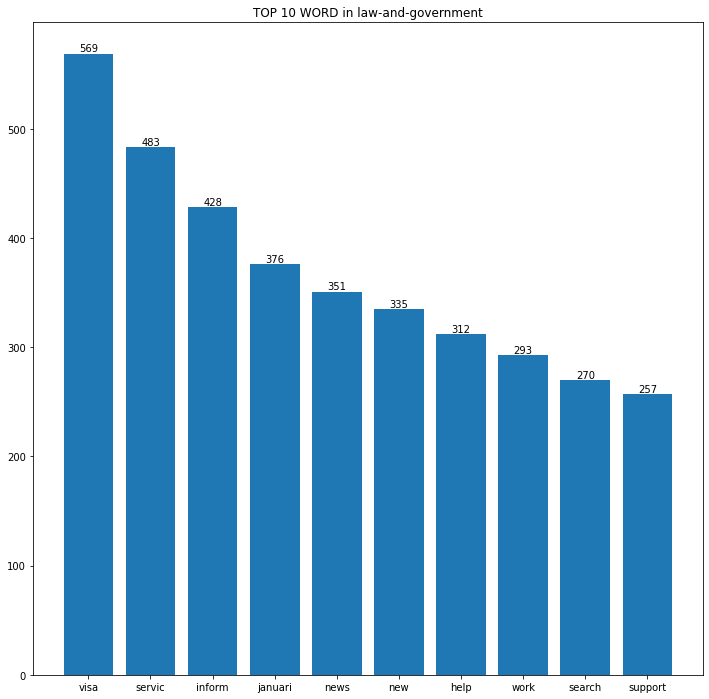

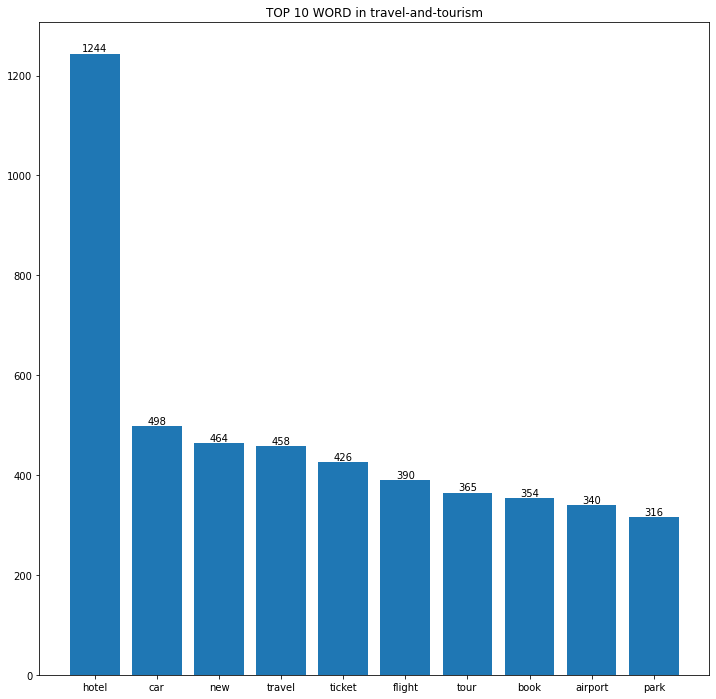

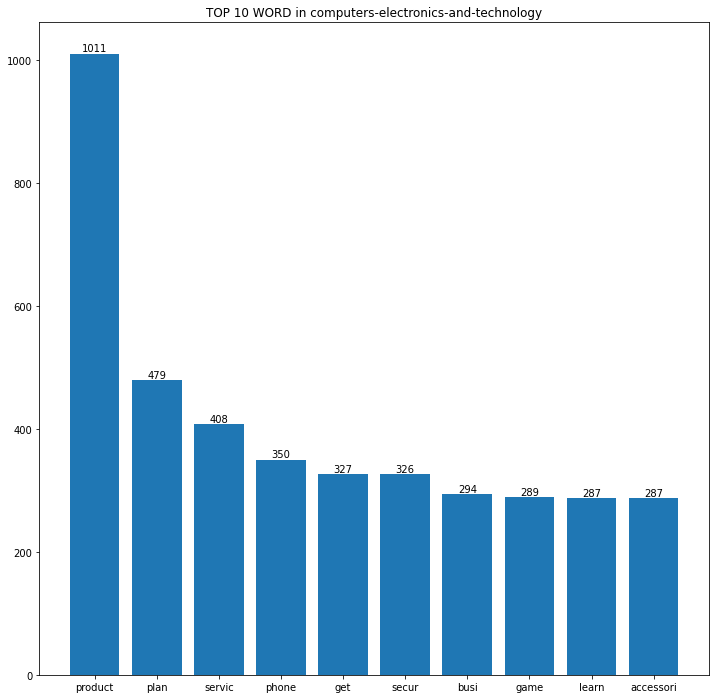

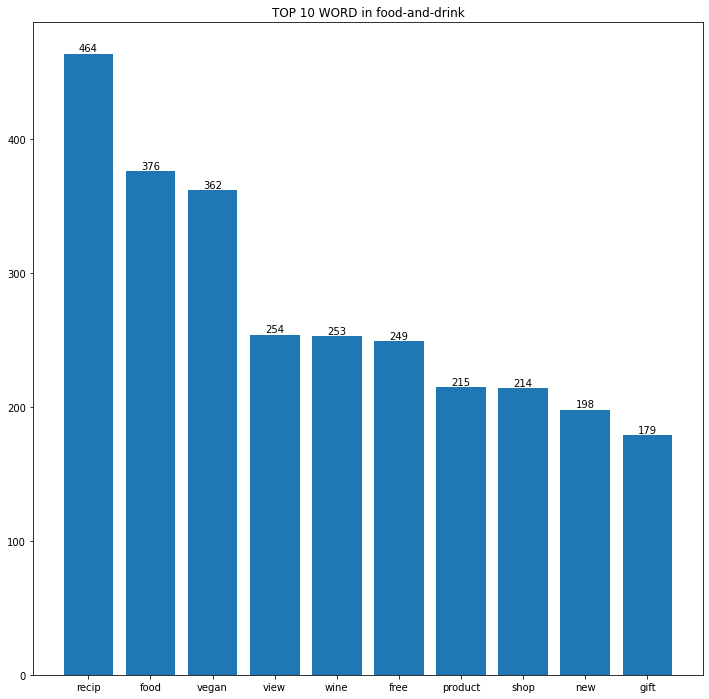

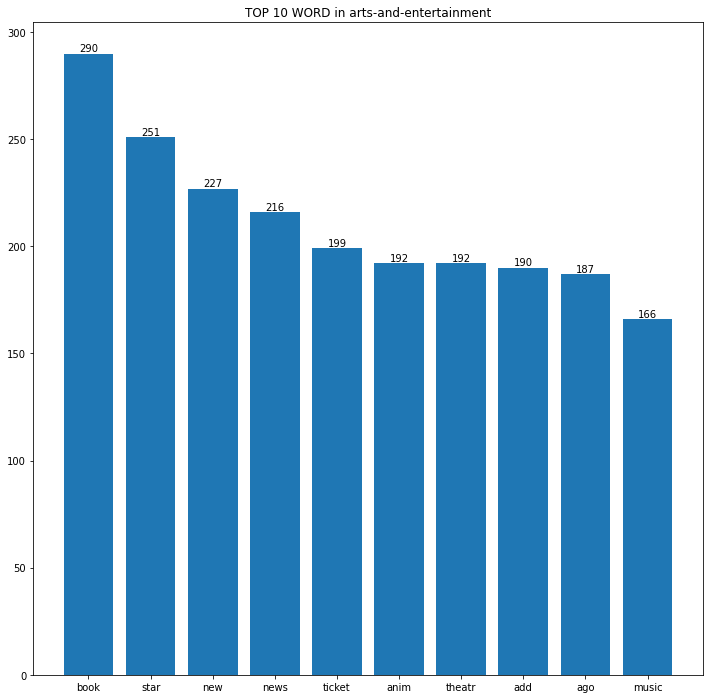

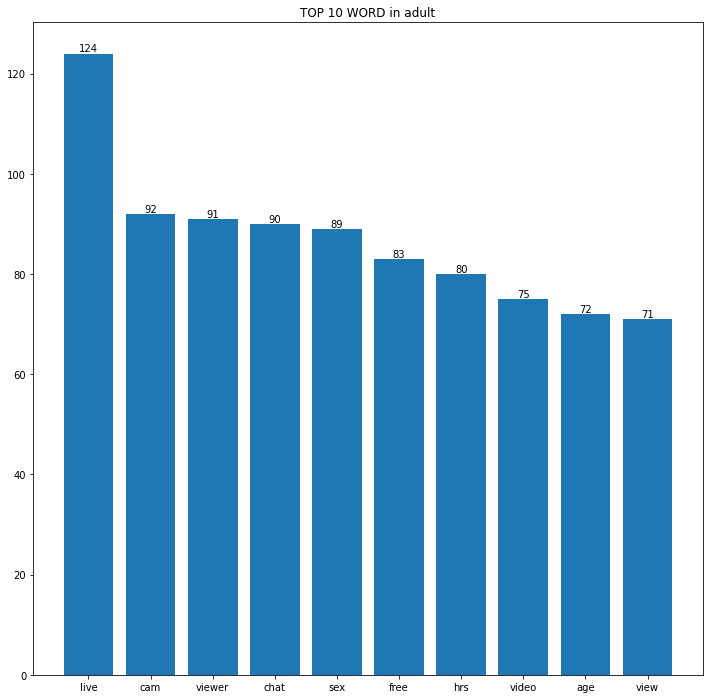

In [ ]:
from collections import Counter
content=''
for i in range(len(list_df_by_category)):
    for j in range (len(list_df_by_category[i])):
            for word in (list_df_by_category[i]["clean_text"][j]):
                content=content+word+' '
    split_it = content.split()
    # Pass the split_it list to instance of Counter class.
    Counters_found = Counter(split_it)
    #print(Counters)
    # most_common() produces k frequently encountered
    # input values and their respective counts.
    most_occur = Counters_found.most_common(10)
    listword=[]
    listcounts=[]
    for k in range(len(most_occur)):
        listword.append(most_occur[k][0])
        listcounts.append(most_occur[k][1])
    print(listword)
    print(listcounts)
    plt.figure(figsize=(12,12))
    plt.bar(listword,listcounts,align="center")
    plt.title("TOP 10 WORD in "+listLabel[i])
    for m in range(len(most_occur)):
        plt.text(m,listcounts[m],listcounts[m],ha="center",va="bottom")
    content=''

In [ ]:
train_set = df.sample(frac=0.7,random_state=42)
test_set = df.drop(train_set.index).reset_index(drop=True)
train_set = train_set.reset_index(drop=True)

(793, 5)


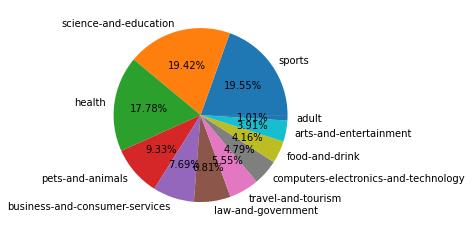

In [ ]:
plt.pie(train_set['Category'].value_counts(), labels = listLabel,autopct='%.2f%%')
plt.show
print(train_set.shape)

(340, 5)


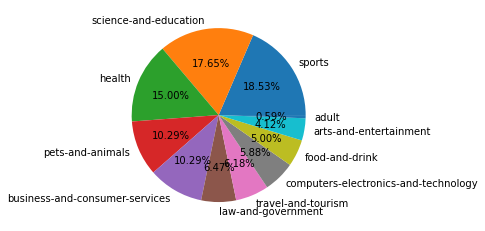

In [ ]:
plt.pie(test_set['Category'].value_counts(), labels = listLabel,autopct='%.2f%%')
plt.show
print(test_set.shape)

In [ ]:
#--------create vocabulary dictionary for the train set---------

#list of distinct words in the vocabulary
vocabulary = list(set(train_set['clean_text'].sum()))

#for each vocabulary word assign it with a value: empty list
listarr=np.empty((len(vocabulary), 0)).tolist()
vocab=dict(zip(vocabulary,listarr))

#initialize the value of each empty list [0,0]
vocab.update((k,[0]*len(listLabel)) for k in vocab) 

In [ ]:
categoryIndexs=dict(zip(listLabel,[i for i in range(len(listLabel))]))

In [ ]:
train_set=train_set.reset_index(drop=True)
print(train_set)

     Unnamed: 0                              Category           website_url  \
0           783                                health    london-fire.gov.uk   
1           898                                health    smiledirectclub.ie   
2           413                                sports       dribblegame.com   
3           467                 science-and-education        philpapers.org   
4           745                    travel-and-tourism               klm.com   
..          ...                                   ...                   ...   
788          48                arts-and-entertainment         funnyjunk.com   
789         191  computers-electronics-and-technology               bell.ca   
790         546                 science-and-education            herzing.ca   
791         515                 science-and-education              noaa.gov   
792         930                                health  adhbce.wordpress.com   

                                               cont

In [ ]:
train_size=train_set.shape[0]
for i in range(train_size):
    for word in train_set['clean_text'][i]:
      vocab[word][categoryIndexs[train_set['Category'][i]]]+=1

In [ ]:
num_of_each =[0]*len(listLabel)
for i in range(len(listLabel)):
  num_of_each[i]=train_set.loc[train_set["Category"]==listLabel[i],"clean_text"].apply(len).sum()

#size of the vocabulary 
num_of_voc=len(vocab)

def p_category_MNB(word,i):
    if word in vocab:
      return (vocab[word][i]+1)/(num_of_each[i]+num_of_voc)
    else:
      return 1/(num_of_each[i]+num_of_voc)

#Multinomial Naive Bayes classifier: 
def MNB_classifier(message):
    p_of_each=[0]*len(listLabel)
    for i in range (len(listLabel)):
      p_of_each[i]=np.log10(train_set['Category'].value_counts()[listLabel[i]]/ train_size)

    for word in message:
        for i in range(len(listLabel)):
          p_of_each[i]+=np.log10(p_category_MNB(word,i))
    max_value = max(p_of_each)
    max_index = p_of_each.index(max_value)
    return listLabel[max_index]

In [ ]:
train_set['predict'] = train_set['clean_text'].apply(MNB_classifier)
correct_train = (train_set['predict'] == train_set['Category']).sum() / train_size * 100 #in %
print(correct_train)

95.08196721311475


In [ ]:
train_set.loc[train_set['predict'] != train_set['Category']]["clean_text"]

28     [red, bull, shop, red, bull, offici, onlin, st...
36     [trend, polit, news, commentari, home, polit, ...
42     [london, school, hygien, tropic, medicin, lsht...
43     [discord, place, talk, hang, login, download, ...
45     [ministri, health, skip, main, content, job, n...
53     [societi, american, basebal, research, member,...
72     [fit, manag, softwar, clubworx, busi, type, ma...
101    [animixplay, goodby, goodby, forev, scrapper, ...
110    [brien, wine, beer, spirit, free, deliveri, ir...
112    [best, class, wod, track, gym, home, price, si...
145    [car, share, across, australia, uber, carshar,...
149    [stream, sourc, unlimit, movi, music, audioboo...
154    [cloud, veterinari, softwar, ezyvet, tour, fea...
205    [regionselect, special, com, special, locat, p...
224    [springer, intern, publish, scienc, technolog,...
244    [univers, law, specialist, provid, legal, educ...
256    [rule, exist, porn, rule, exist, porn, start, ...
273    [overdr, ebook, audioboo

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(train_set['Category'],train_set['predict'],digits=4))
print(confusion_matrix(train_set['Category'],train_set['predict']))
print(accuracy_score(train_set['Category'],train_set['predict']))

                                      precision    recall  f1-score   support

                               adult     1.0000    0.7500    0.8571         8
              arts-and-entertainment     1.0000    0.8387    0.9123        31
      business-and-consumer-services     0.9125    0.9865    0.9481        74
computers-electronics-and-technology     0.9459    0.9211    0.9333        38
                      food-and-drink     0.9655    0.8485    0.9032        33
                              health     0.9653    0.9858    0.9754       141
                  law-and-government     0.9623    0.9444    0.9533        54
                    pets-and-animals     1.0000    0.8852    0.9391        61
               science-and-education     0.8953    0.9935    0.9419       155
                              sports     1.0000    0.9416    0.9699       154
                  travel-and-tourism     0.9149    0.9773    0.9451        44

                            accuracy                         0

Text(292.20000000000016, 0.5, 'predicted label')

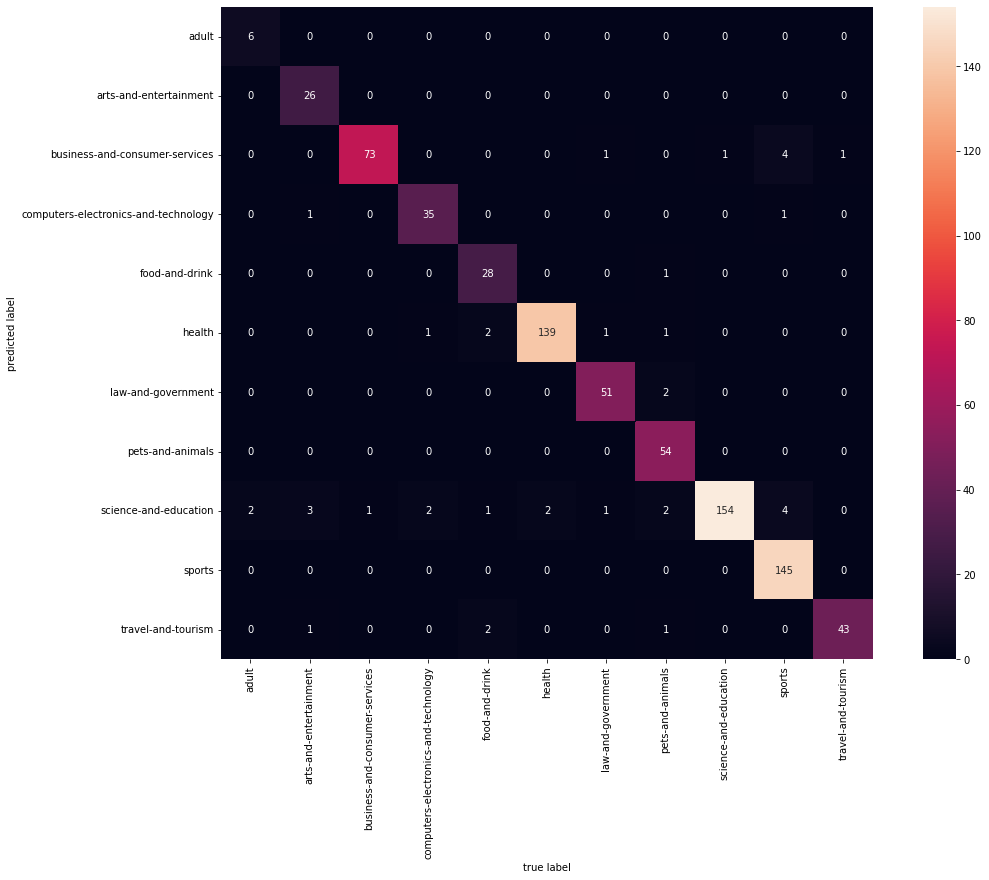

In [ ]:
import seaborn as sns
mat=confusion_matrix(train_set['Category'],train_set['predict'])
plt.figure(figsize=(18,12))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(listLabel),
            yticklabels=np.unique(listLabel)
           )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
test_set['predict'] = test_set['clean_text'].apply(MNB_classifier)
correct_test = (test_set['predict'] == test_set['Category']).sum() / test_set.shape[0] *100 #in %
print(correct_test)

71.76470588235294


In [ ]:
test_set.loc[test_set['predict'] != test_set['Category']]["clean_text"]

4      [picturehous, cinema, book, best, film, event,...
5      [welcom, ticketsolv, art, cultur, box, offic, ...
6      [new, use, book, buy, cheap, book, onlin, thri...
7      [trope, trope, media, brows, index, forum, vid...
9      [stream, movi, live, onlin, hulu, hulu, get, t...
                             ...                        
328    [center, european, polici, analysi, cepa, cepa...
331    [depart, conserv, skip, content, depart, conse...
332    [home, christchurch, citi, council, skip, main...
333    [offici, home, new, zealand, passport, site, u...
339    [rnzn, communic, associ, skip, content, rnzn, ...
Name: clean_text, Length: 96, dtype: object

Text(292.20000000000016, 0.5, 'predicted label')

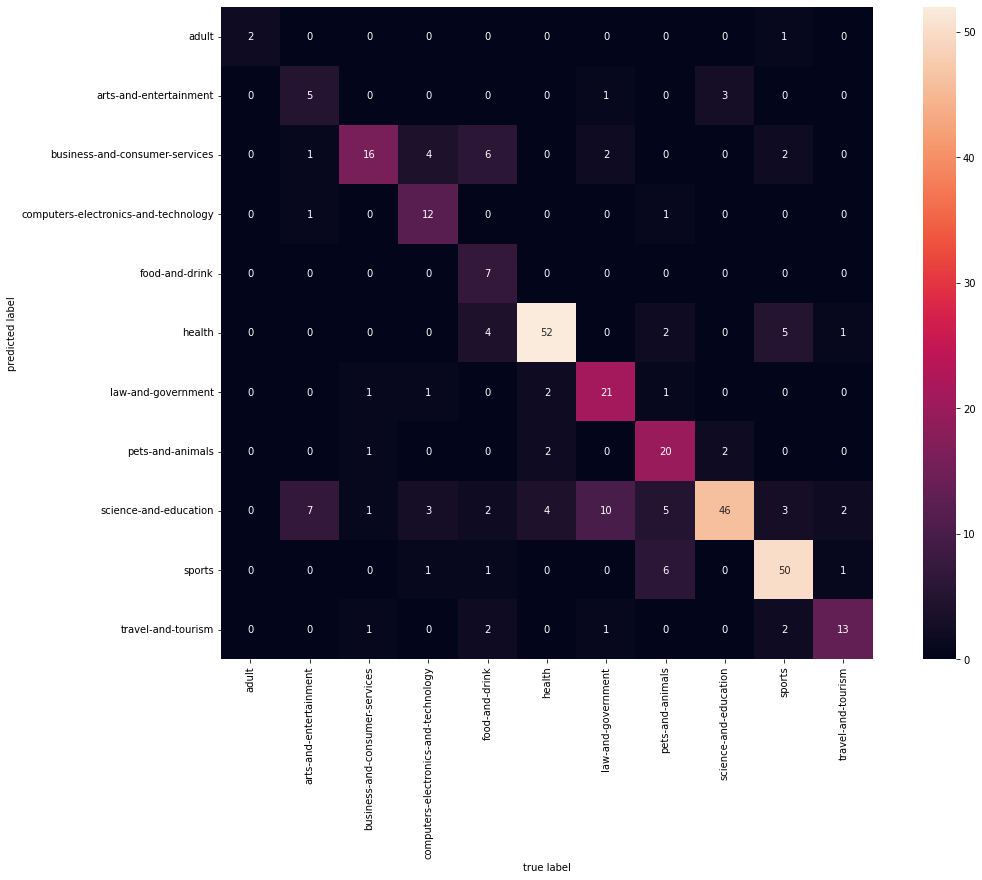

In [ ]:
mat=confusion_matrix(test_set['Category'],test_set['predict'])
plt.figure(figsize=(18,12))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(listLabel),
            yticklabels=np.unique(listLabel)
           )
plt.xlabel('true label')
plt.ylabel('predicted label')